<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
######################

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

1) K-means with test data 


In [ ]:
data = np.loadtxt("data_kmeans.txt")
np.random.shuffle(data)

In [ ]:
#function i will use for math 
def indicator(A,B):
  I = 0
  if A == B:
    I = 1
  else:
    I = 0

  return I

# found on stack overflow 
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))


In [ ]:
##################
#Definitions#
#  X -> Represengts the Data Input 
#  K -> Represents the # of cluster
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
#  J -> number of centroids which is equal to K
##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [ ]:
##################
#Definitions#
#  X -> Represengts the Data Input 
X_train = data[:200,:]
X_test = data[200:,:]

#  K -> Represents the # of cluster
K = 3
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
I = 300
I_train = 200
I_test = 100
#  J -> number of centroids which is equal to K
J = K
# N -> number of features
N = 2
# initialize the array which will contain the distance
D = np.zeros((I_train,K))


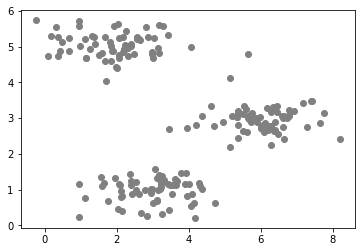

In [ ]:
# inialize and standardize the data
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")

In [ ]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
max_x = np.max(X_train[:,0])
min_x = np.min(X_train[:,0])

max_y = np.max(X_train[:,1])
min_y = np.min(X_train[:,1])
# we compute mu :
mu_x = [ np.random.uniform(min_x,max_x) for mu in range(J) ] 
mu_y = [ np.random.uniform(min_y,max_y) for mu in range(J) ] 
mu = np.array((mu_x,mu_y)).T
print(mu)

[[4.73550378 1.34240177]
 [3.12760804 4.53391321]
 [0.4952096  0.94620039]]


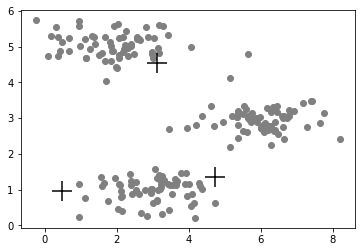

In [ ]:
# visualisation:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [ ]:
######################################
# compute the distance between each point and each centroid and stock it in a distance array named D using the norm 2 
# D is of dimension I * K because for each point (I point) we have K distance ( one for each centroid)


def distance(I_train,K,mu,X_train,D):
  for i in range(I_train):
    for j in range(K):
        D[i,j] = (X_train[i,0] - mu[j,0])**2 + (X_train[i,1] - mu[j,1])**2

  return D

###### update the centroid by computing the barycenter of the point assigned to that centroid
def update_center(X_train,yes,mu,K,I_train):
  for k in range(K):
     mu[k,0] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,0]) /  sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,1] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,1]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
  return mu


In [ ]:
######################################
# repeat the training for 10 iteration, it will be enough to reach convergence
for h in range(10):
  D = distance(I_train,K,mu,X_train,D)
  yes = np.argmin(D,axis=1)
  update_center(X_train,yes,mu,K,I_train)


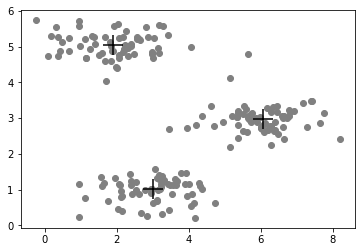

In [ ]:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [ ]:
#this part was a part of the lab, we will now test K-means on some real data.

## **2.1 K-means:Clustering some real data**

In [124]:
data=pd.read_csv("grade_students.csv")
data_array = data.to_numpy()

all the function used in this part were written above.

In [125]:
##################
#Definitions#
# data #  X -> Represents the Data Input 
K = 3#  K -> Represents the # of cluster 
I = 5550 # I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
J = K  #  J -> number of centroids which is equal to K
N = 6 # number of feature

# initialize the array which will contain the distance
D = np.zeros((I,K))

##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [126]:
# inialize and standardize the data
print(data.shape)
data.head()

(5550, 6)


,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426


In [127]:
print(min(data["g1freelunch"]),max(data["g1freelunch"]))
print(min(data["g1absent"]),max(data["g1absent"]))
print(min(data["g1readscore"]),max(data["g1readscore"]))
print(min(data["g1mathscore"]),max(data["g1mathscore"]))
print(min(data["g1listeningscore"]),max(data["g1listeningscore"]))
print(min(data["g1wordscore"]),max(data["g1wordscore"]))
print("We have an idea of how the value the data can take for each feature, we can initialize our centroid around such value ")

0 1
0 84
404 651
404 676
477 708
317 601
We have an idea of how the value the data can take for each feature, we can initialize our centroid around such value 


In [128]:
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
# we have three cluster namely Weak, Average and Gifted 
# We have 6 different criteria to build our cluster 
# We should have 3 different centroid, each of a dimension 6.

In [129]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
# we know the max and min of each column of our dataframe 

# we compute mu :
mu_x = [ np.random.uniform(0,1) for mu in range(J) ] 
mu_y = [ np.random.uniform(0,84) for mu in range(J) ] 
mu_z = [ np.random.uniform(404,651) for mu in range(J) ] 
mu_w = [ np.random.uniform(404,676) for mu in range(J) ] 
mu_u = [ np.random.uniform(477,708) for mu in range(J) ] 
mu_t = [ np.random.uniform(317,601) for mu in range(J) ] 
mu = np.array((mu_x,mu_y,mu_z,mu_w,mu_u,mu_t)).T
print(mu)
# we can verify that our mu have the right dimension namely 3*6 or J*N
mu.shape

[[5.27233234e-01 7.54074272e+01 5.15089479e+02 6.74118057e+02
  5.97504821e+02 3.23426496e+02]
 [6.19699162e-01 4.15204572e+01 5.82771551e+02 4.26193151e+02
  6.88946945e+02 3.36286409e+02]
 [2.49143161e-01 7.42456569e+01 4.45829632e+02 6.19134408e+02
  6.30696168e+02 5.41703440e+02]]


(3, 6)

In [130]:
for g in range(100):
### compute the distance between each point for each centroid
  D = distance(I,K,mu,data_array,D)
#### compute the argmin of the distance between each point and each centroid
  yes = np.argmin(D,axis=1)
#### update the centroid by computing the barycenter of the point assigned to that centroid
  update_center(data_array,yes,mu,K,I)

In [131]:
mu_data = pd.DataFrame(mu, index=['Weak', 'Average', 'Gifted'], columns=data.columns)
mu_data.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
Weak,0.708633,27.992806,515.089479,674.118057,597.504821,323.426496
Average,0.476396,3.664419,582.771551,426.193151,688.946945,336.286409
Gifted,0.522045,12.665815,445.829632,619.134408,630.696168,541.703440
